# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.
## Uso de regresion lineal con scikit-learn

#### *Diego Alberto Baños Lopez*
#### *A01275100*



## Introducción

En este notebook se busca aplicar librerias en python que ayude a facilitar la modelacion del dataset a usar


## Parte 1: Importacion de librerias y leer el dataset
Para ello se requiere que primeramente leamos las librerias necesarias y una vez realizado ello se guarda el dataset como data


In [1]:
# En caso de no tener instalado alguna libreria favor de descomentar la siguiente linea de codigo
# !pip install -U pandas
# !pip install -U seaborn
# !pip install -U matplotlib
# !pip install -U scikit-learn
# Pandas es usado para importar el CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# El dataset a usar se llama Ice Cream Revenue
# Los datos se pueden obtener de https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue
data = pd.read_csv("./IceCreamData.csv")
data.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [2]:
# Caracteristicas del dataset
data_info = {
    "number_of_records": data.shape[0],
    "number_of_features": data.shape[1] - 1,  # Subtracting the target column
    "features": list(data.columns),
}
# Estadísticas descriptivas de cada característica
descriptive_stats = data.describe()

# Información sobre valores faltantes o nulos en el dataset
missing_values = data.isnull().sum()

# Si la columna objetivo es numérica, podemos obtener su rango de valores
# Si es categórica, podemos obtener las clases únicas y su distribución
if pd.api.types.is_numeric_dtype(data[data_info["features"][-1]]):
    target_range = (
        data[data_info["features"][-1]].min(),
        data[data_info["features"][-1]].max(),
    )
    target_info = {"type": "numeric", "range": target_range}
else:
    unique_classes = data[data_info["features"][-1]].unique()
    class_distribution = data[data_info["features"][-1]].value_counts()
    target_info = {
        "type": "categorical",
        "unique_classes": unique_classes,
        "class_distribution": class_distribution,
    }

# Agregando la información adicional al diccionario data_info
data_info["descriptive_stats"] = descriptive_stats
data_info["missing_values"] = missing_values
data_info["target_info"] = target_info

def print_data_info(data_info):
    print("Información del Dataset:\n")
    
    # Imprimir información básica
    print(f"Número de registros: {data_info['number_of_records']}")
    print(f"Número de características: {data_info['number_of_features']}")
    print(f"Características: {', '.join(data_info['features'])}\n")
    
    # Imprimir estadísticas descriptivas
    print("Estadísticas Descriptivas:")
    print(data_info['descriptive_stats'])
    print("\n")
    
    # Imprimir información sobre valores faltantes
    print("Valores Faltantes por Característica:")
    for feature, missing in data_info['missing_values'].items():
        print(f"{feature}: {missing}")
    print("\n")
    
    # Imprimir información de la columna objetivo
    print("Información de la Columna Objetivo:")
    if data_info['target_info']['type'] == 'numeric':
        print(f"Tipo: Numérico")
        print(f"Rango: {data_info['target_info']['range']}")
    else:
        print(f"Tipo: Categórico")
        print(f"Clases Únicas: {', '.join(data_info['target_info']['unique_classes'])}")
        print("Distribución de Clases:")
        for cls, count in data_info['target_info']['class_distribution'].items():
            print(f"{cls}: {count}")
    print("\n")

print_data_info(data_info)

Información del Dataset:

Número de registros: 500
Número de características: 1
Características: Temperature, Revenue

Estadísticas Descriptivas:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000


Valores Faltantes por Característica:
Temperature: 0
Revenue: 0


Información de la Columna Objetivo:
Tipo: Numérico
Rango: (10.0, 1000.0)




In [3]:
#Descripcion breve del dataset
num_samples = data.shape[0]
num_features = data.shape[1]
output_range = (data['Revenue'].min(), data['Revenue'].max())

print("Cantidad de muestras: ", num_samples)
print("Número de caracterías: ", num_features)
print("Rango de valores de salida (Revenue): ", output_range)

Cantidad de muestras:  500
Número de caracterías:  2
Rango de valores de salida (Revenue):  (10.0, 1000.0)


El dataset "IceCreamData.csv" contiene dos columnas:

1. **Temperature**: Representa la temperatura.
2. **Revenue**: Representa los ingresos obtenidos.

Dado que estamos tratando con un conjunto de datos que tiene una variable independiente (temperatura) y una variable dependiente (ingresos), se puede abordar la prediccción de los ingresos en base a la temperatura a tráves de regresión lineal

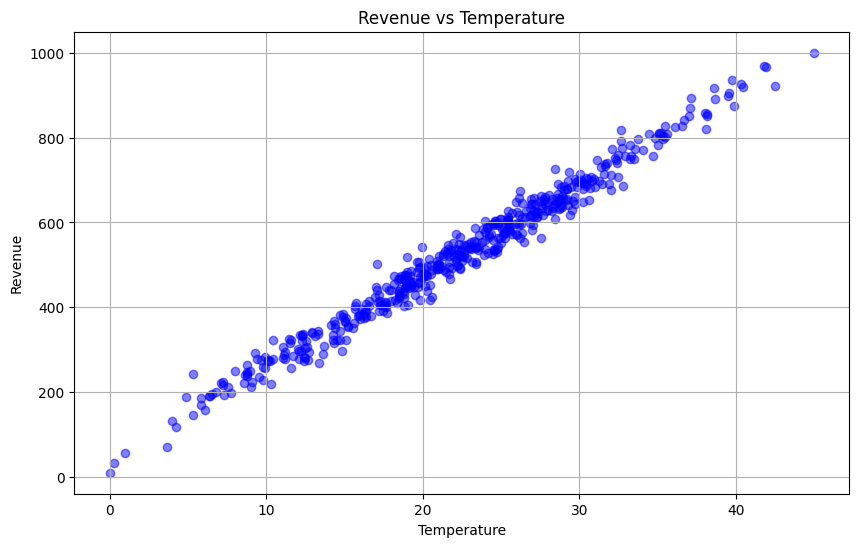

In [4]:
# Gráfico de dispersión entre Temperature y Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Revenue'], color='blue', alpha=0.5)
plt.title('Revenue vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## Parte 2: División de datos en train y test
Esto trata de dividir el dataset en dos, uno de entrenamiento y otro de verificación, se hace con el objetivo de verificar si realmente se esta entrenando el modelo de forma correcta

In [5]:
# Variable Independiente
X = data[['Temperature']]
# Variable Dependiente
y = data['Revenue'] 
# División del dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(), y_train.head()

(     Temperature
 249    18.148952
 433     8.756004
 19     21.775948
 322    18.439982
 332    15.843022,
 249    473.568112
 433    246.787161
 19     534.622865
 322    463.480508
 332    379.564268
 Name: Revenue, dtype: float64)

## Parte 3: Entrenamiento del Modelo

En esta parte usaremos las librerias de Scikit-learn para realizar nuestro modelado de regresión lineal.

In [6]:
"""
Tenemos que recordar que LinearRegression tiene 3 parametros a modificar

* fit_intercept: Establecer a False. Esto indica que no se calculará el 
intercepto para este modelo. (True por defecto)

* copy_X: Establecer a False. Si es True, X será copiado; de lo contrario, 
podría ser sobrescrito. (True por defecto)

* positive: Establecer a True. Esto forzará a que los coeficientes sean positivos.
(False por defecto)
"""
model = LinearRegression(fit_intercept=False, copy_X=False, positive=True)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Presentar las métricas de desempeño de manera clara
metrics_df = pd.DataFrame({
    'Metric': ['MSE (Train)', 'R^2 (Train)', 'MSE (Test)', 'R^2 (Test)'],
    'Value': [train_mse, train_r2, test_mse, test_r2]
})

metrics_df


,Metric,Value
0,MSE (Train),880.516975
1,R^2 (Train),0.971794
2,MSE (Test),769.160774
3,R^2 (Test),0.973069


En base al alto $R^2$ y al puntaje de MSE que es relativamente bajo en ambos casos, podemos decir que la temperatura tiene una fuerte relación con el ingreso y que el modelo generaliza bien a nuevos datos

## Parte 4: Predicciones del modelo y visualización del modelo

Aqui se intenta predecir usando el modelo y se compara con los datos reales para ver como se comporta y ver que tanto difiere el modelo con los datos reales

In [7]:
sample_data = X_test.iloc[:3]
real_values = y_test.iloc[:3]
predicted_values = model.predict(sample_data)

predictions_comparison = pd.DataFrame({
    'Real Revenue': real_values,
    'Predicted Revenue': predicted_values
})

predictions_comparison

,Real Revenue,Predicted Revenue
361,659.873287,690.459672
73,623.248701,636.328236
374,559.135869,557.511621


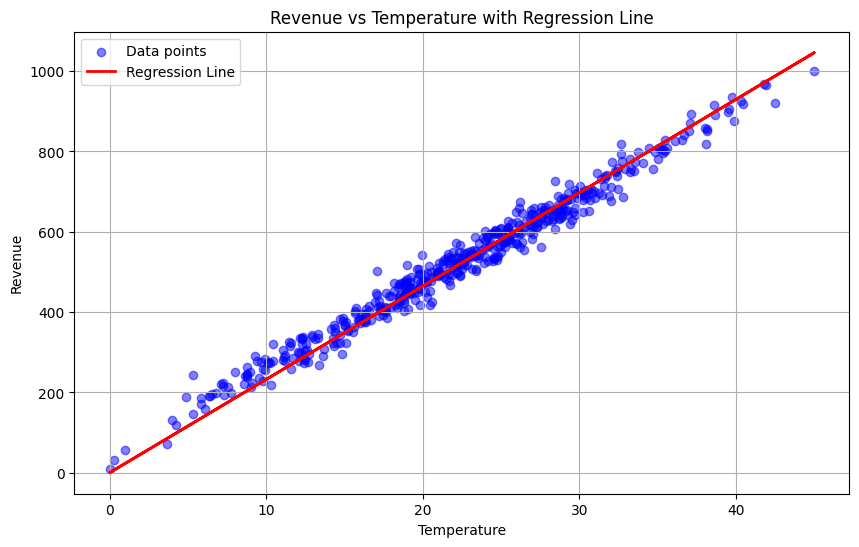

In [8]:
# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Revenue'], color='blue', alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Revenue vs Temperature with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()